In [74]:
import pandas as pd
import numpy as np


In [91]:
df = pd.read_csv('updated_pollution_dataset.csv')

df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [92]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [93]:
df.shape

(5000, 10)

In [94]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

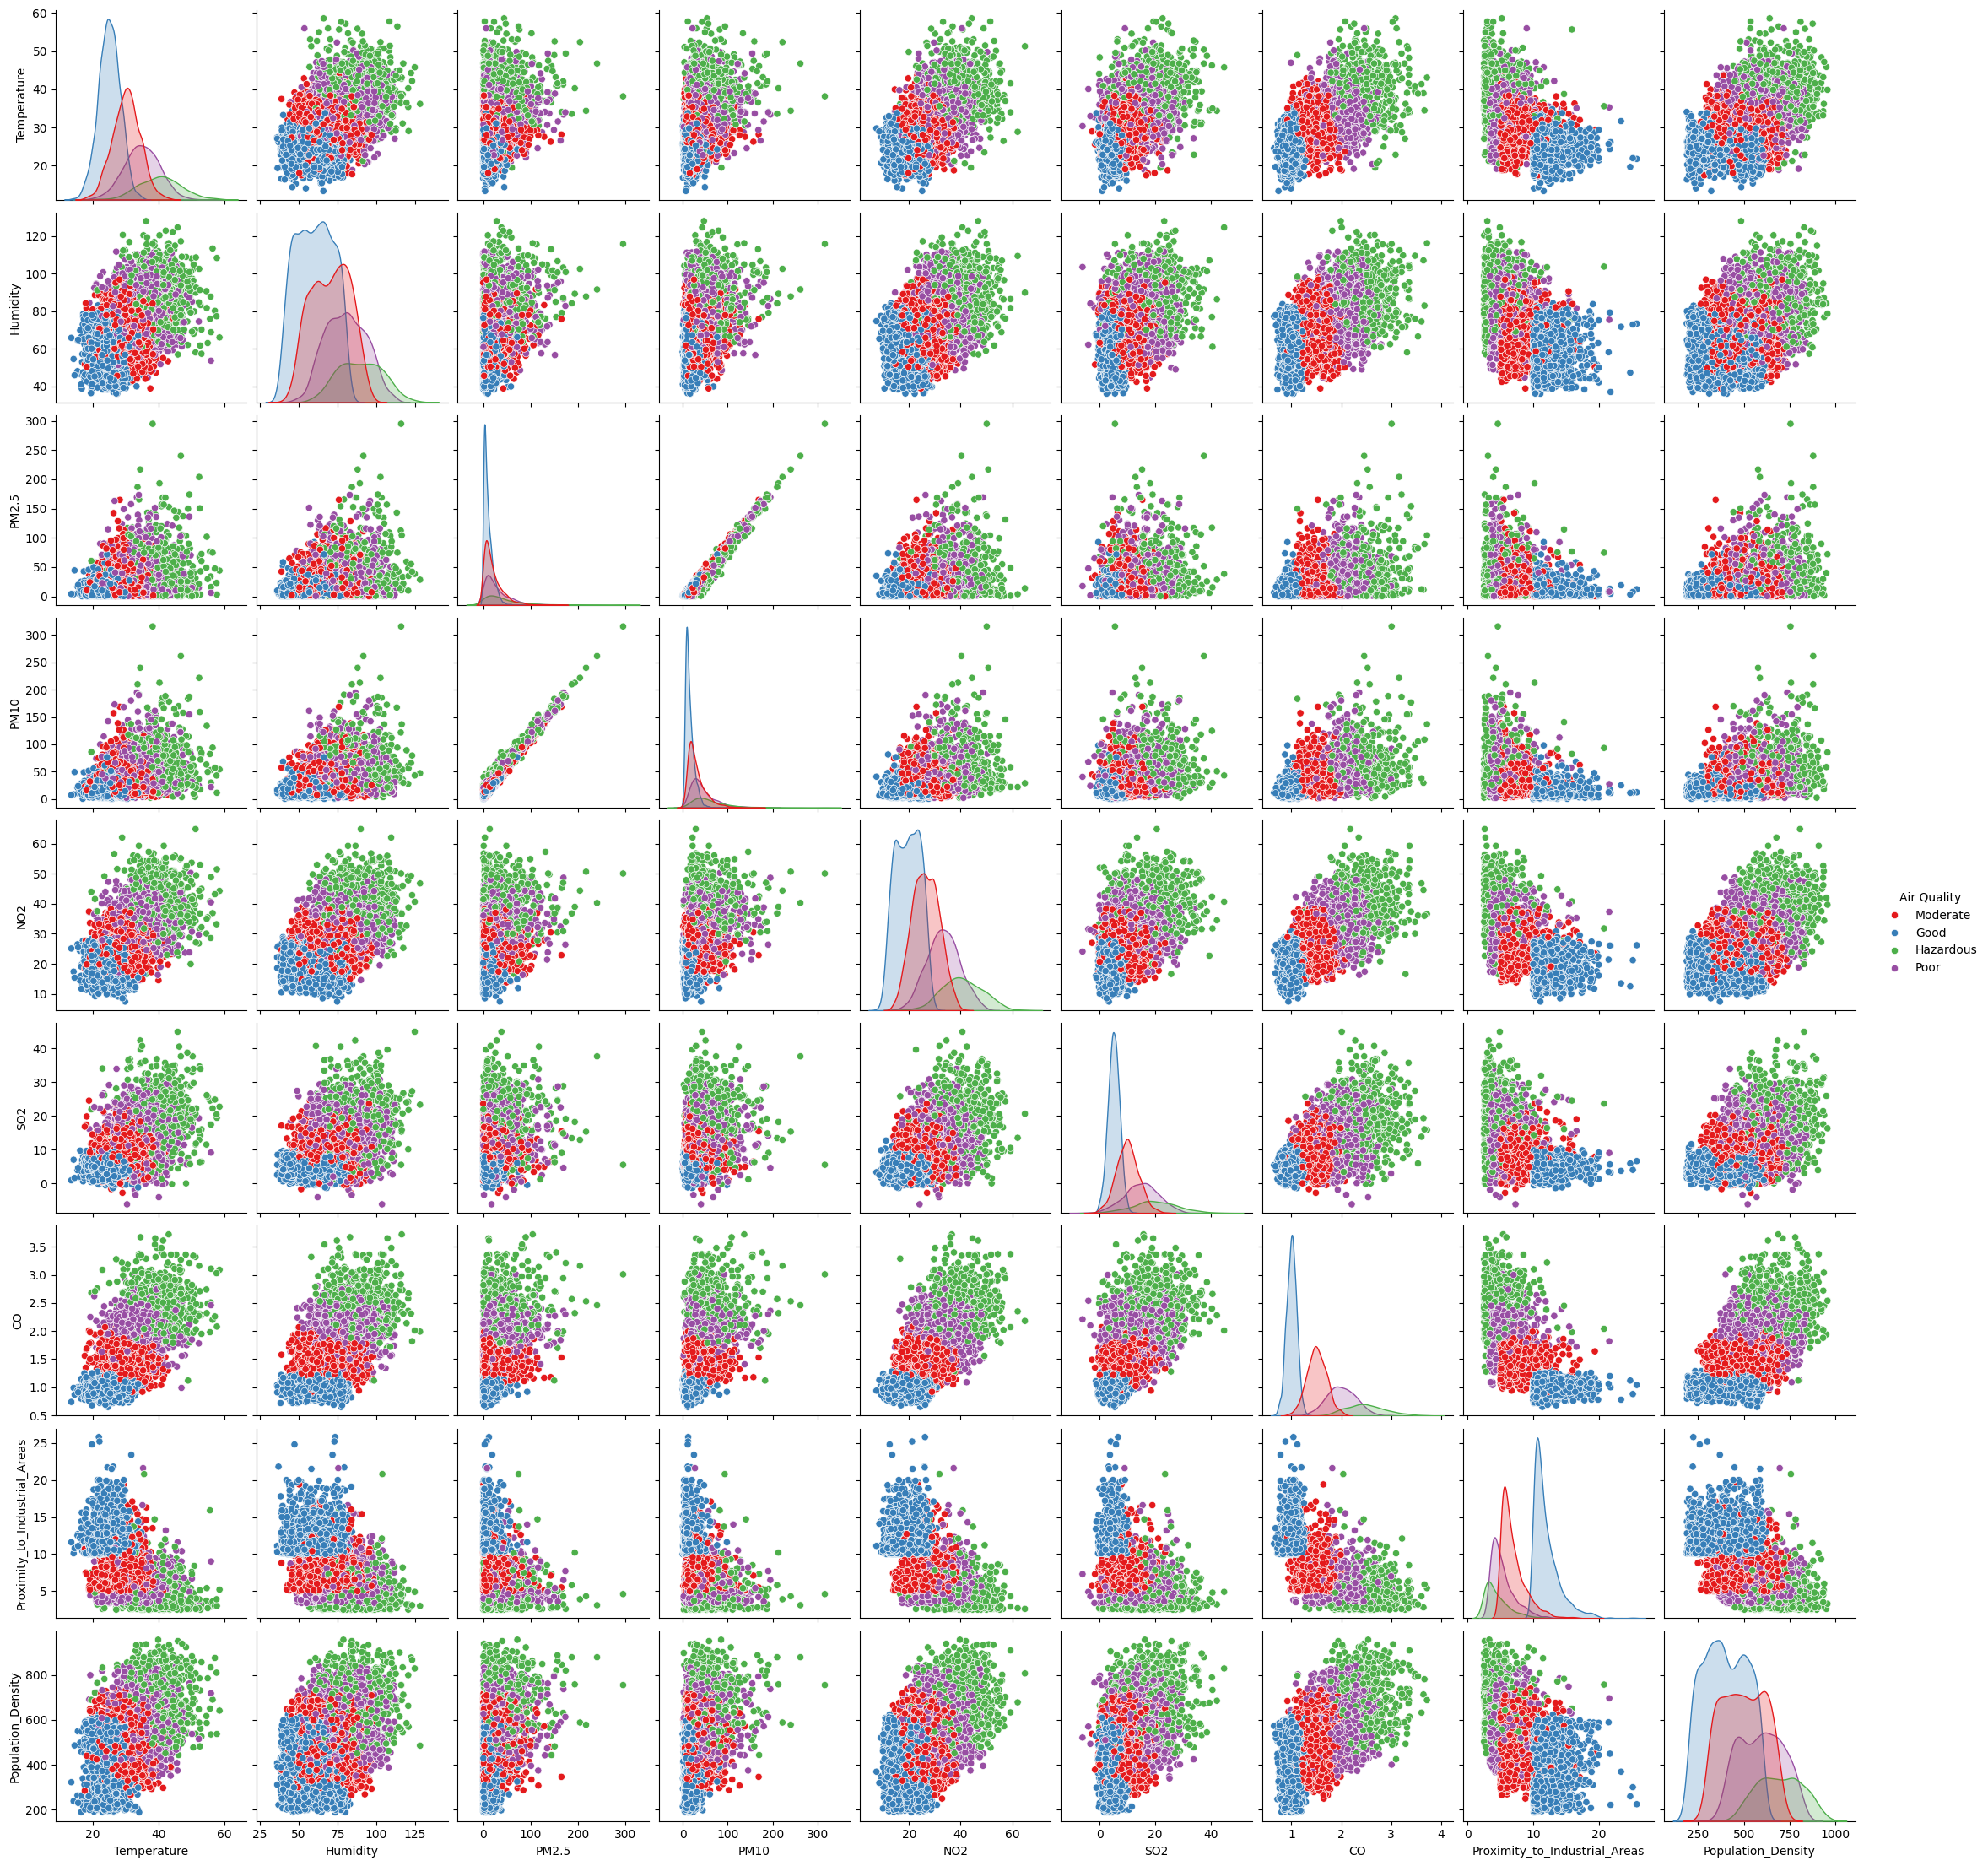

In [78]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot scatter plot
sns.pairplot(df, hue='Air Quality', palette='Set1')
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Air Quality' column
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])

# Display the updated dataframe
print(df.head())

# Display the classes
print("Classes:", encoder.classes_)
# Display unique labels and their corresponding numbers
unique_labels = df['Air Quality'].unique()
label_mapping = {label: encoder.transform([label])[0] for label in encoder.classes_}
print("Unique labels and their corresponding numbers:", label_mapping)

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                            6.3                 319            2  
1                            6.0                 611            2  
2                            5.2                 619            2  
3                           11.1                 551            0  
4                           12.7                 303            0  
Classes: ['Good' 'Hazardous' 'Moderate' 'Poor']
Unique labels and their corresponding numbers: {'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


In [95]:
# Create a heatmap of the dataframe
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Moderate'

<Figure size 1200x800 with 0 Axes>

In [96]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [97]:
df = df[['Temperature', 'Humidity', 'PM10', 'NO2', 'SO2', 'CO', 'Air Quality']]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

# 2. Encode label menjadi integer
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Lihat mapping label
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# 3. Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Konversi ke numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train
y_test = y_test

# 5. Reshape data agar sesuai dengan input LSTM (samples, timesteps, features)
# Misalkan data tidak memiliki timesteps, kita tambahkan dimensi agar timesteps = 1
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

Label Mapping: {'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential(
    [
        LSTM(128, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        Dense(64, activation = 'tanh'),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(4, activation = 'softmax')
    ]
)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
from contextlib import redirect_stdout


# Save the model summary to a CSV file
with open('model_summary.csv', 'w') as f:
    with redirect_stdout(f):
        model.summary()


Model: "sequential_21"

+--------------------------------------------------------------------------+
| Layer (type)                    | Output Shape           |       Param # |
|---------------------------------+------------------------+---------------|
| lstm_44 (LSTM)                  | (None, 1, 128)         |        69,120 |
|---------------------------------+------------------------+---------------|
| dropout_66 (Dropout)            | (None, 1, 128)         |             0 |
|---------------------------------+------------------------+---------------|
| dense_46 (Dense)                | (None, 1, 64)          |         8,256 |
|---------------------------------+------------------------+---------------|
| dropout_67 (Dropout)            | (None, 1, 64)          |             0 |
|---------------------------------+------------------------+---------------|
| lstm_45 (LSTM)                  | (None, 32)             |        12,416 |
|---------------------------------+------------------------+---------------|
| dropout_68 (Dropout)            | (None, 32)             |             0 |
|---------------------------------+------------------------+---------------|
| dense_47 (Dense)                | (None, 4)              |           132 |
+--------------------------------------------------------------------------+

 Total params: 269,774 (1.03 MB)

 Trainable params: 89,924 (351.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,850 (702.54 KB)

In [121]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
optimizer = Adam(learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4645 - loss: 1.1801 - val_accuracy: 0.6737 - val_loss: 0.7696
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 0.7412 - val_accuracy: 0.7663 - val_loss: 0.6053
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.6329 - val_accuracy: 0.8188 - val_loss: 0.4932
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7594 - loss: 0.5630 - val_accuracy: 0.8225 - val_loss: 0.4473
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7763 - loss: 0.5266 - val_accuracy: 0.8500 - val_loss: 0.4002
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8220 - loss: 0.4401 - val_accuracy: 0.8687 - val_loss: 0.3651
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8174 - loss: 0.4319 - val_accuracy: 0.8712 - val_loss: 0.3423
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.3863 - val_accuracy: 0.

In [123]:
from sklearn.metrics import f1_score

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the f1-score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"F1-Score: {f1}")

F1-Score has been recorded to model.csv
